In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rnd_n_gen(u0, a, c, m, iter):
    nums = []
    nums.append(u0)
    for i in range(iter):
        u = (a * u0 + c) % m
        nums.append(u)
        u0 = u
    return nums

rnd_n_gen(5, 4, 1, 15, 20)

[5, 6, 10, 11, 0, 1, 5, 6, 10, 11, 0, 1, 5, 6, 10, 11, 0, 1, 5, 6, 10]

If we happen to go with 
$$
u_{i} = (au_{i+j} + cu_{i+k})\text{mod}\,m
$$
we would need a seed sequence, as opposed to a single seed value, as given for the example of prior random number generator.

In [3]:
def rnd_n_gen_2(seed_seq, a, c, m, iter, j, k):
    nums = []
    for num in seed_seq:
        nums.append(num)
    for i in range(iter):
        u = (a * nums[i + j] + c * nums[i + k]) % m
        nums.append(u)

    return nums

rnd_n_gen_2([1,5,2,7,2,10], 4, 19, 20, 20, 2, 3)

[1,
 5,
 2,
 7,
 2,
 10,
 1,
 6,
 18,
 19,
 18,
 6,
 13,
 18,
 6,
 11,
 14,
 6,
 13,
 10,
 10,
 11,
 2,
 10,
 9,
 2]

If we might happen to generate random floats, in this case between 0 and 1, we can actually make use of the prior functions, and have a float given by
$$
r_{i} = u_{i}/m
$$

In [4]:
np.array(rnd_n_gen(5, 4, 1, 15, 20))/15

array([0.33333333, 0.4       , 0.66666667, 0.73333333, 0.        ,
       0.06666667, 0.33333333, 0.4       , 0.66666667, 0.73333333,
       0.        , 0.06666667, 0.33333333, 0.4       , 0.66666667,
       0.73333333, 0.        , 0.06666667, 0.33333333, 0.4       ,
       0.66666667])

We can eventually extend this to any interval $[a,b[$, by having
$$
x_{i} = a + (b-a)r_{i}
$$

In [5]:
a = 1
b = np.pi
nums_transformed = []
for num in np.array(rnd_n_gen(5, 21, 2, 40, 40))/15:
    nums_transformed.append(a + (b - a)*num)

nums_transformed

[1.7138642178632644,
 4.854866776461628,
 2.284955592153876,
 5.42595815075224,
 2.856046966444487,
 5.997049525042851,
 3.4271383407350986,
 6.5681408993334625,
 3.99822971502571,
 1.4283185307179587,
 4.569321089316322,
 1.9994099050085703,
 5.140412463606934,
 2.5705012792991813,
 5.711503837897546,
 3.141592653589793,
 6.2825952121881565,
 3.7126840278804045,
 1.142772843572653,
 4.283775402171017,
 1.7138642178632644,
 4.854866776461628,
 2.284955592153876,
 5.42595815075224,
 2.856046966444487,
 5.997049525042851,
 3.4271383407350986,
 6.5681408993334625,
 3.99822971502571,
 1.4283185307179587,
 4.569321089316322,
 1.9994099050085703,
 5.140412463606934,
 2.5705012792991813,
 5.711503837897546,
 3.141592653589793,
 6.2825952121881565,
 3.7126840278804045,
 1.142772843572653,
 4.283775402171017,
 1.7138642178632644]

Good number generators should have as large a period as possible, and should not have noticeable correlations.

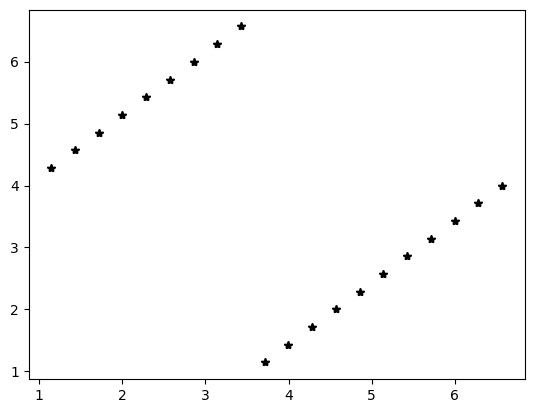

In [6]:
num_pairs = [(nums_transformed[i], nums_transformed[i + 1]) for i in range(len(nums_transformed) - 1)]
x, y = zip(*num_pairs)
plt.plot(x, y, "k*")

This would be an example of a bad RNG, as we can clearly notice correlations.

In [7]:
np.histogram(nums_transformed) # Here we also see that these vals are equidistributed for the major part

(array([4, 5, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([1.14277284, 1.68530965, 2.22784645, 2.77038326, 3.31292007,
        3.85545687, 4.39799368, 4.94053048, 5.48306729, 6.02560409,
        6.5681409 ]))

In [8]:
import random
random.seed(42)

In [9]:
gaussian = np.random.normal(-1, 1, (50,50))
np.histogram(gaussian)

(array([  8,  39, 179, 419, 675, 654, 383, 122,  19,   2]),
 array([-4.47474611, -3.7569093 , -3.03907248, -2.32123567, -1.60339886,
        -0.88556205, -0.16772524,  0.55011158,  1.26794839,  1.9857852 ,
         2.70362201]))

In [10]:
uniform = np.random.uniform(-1, 1, (50,50))
np.histogram(uniform)

(array([271, 240, 241, 248, 235, 239, 263, 256, 264, 243]),
 array([-9.99483375e-01, -7.99594843e-01, -5.99706311e-01, -3.99817779e-01,
        -1.99929247e-01, -4.07155389e-05,  1.99847816e-01,  3.99736348e-01,
         5.99624880e-01,  7.99513412e-01,  9.99401944e-01]))